<a href="https://colab.research.google.com/github/kishore-R10/CRUD/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
files.upload()

Saving college_1.csv to college_1 (2).csv
Saving college_2.csv to college_2 (2).csv


{'college_1.csv': b'Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising\r\nA.Dharani,82,20,24500,24500,Computer Science and Engineering,0\r\nV.JEEVITHA ,82,20,21740,21740,Computer Science and Engineering,0\r\nHEMAVATHI.R,100,100,19680,19680,Computer Science and Engineering,0\r\nMugunthan S,100,47,10610,10610,Computer Science and Engineering,0\r\nSathammai.S,100,8,8980,8980,Computer Science and Engineering,0\r\nNIVEESHWAR S,100,0,8200,8200,Computer Science and Engineering,0\r\nKALAIARASAN K,85,47,7750,7880,Electronics and Communication Engineering,130\r\nMOHAMED ZUBAIR AHMED,82,4,7020,7020,Computer Science and Engineering,0\r\nJ.SUGANTHI,27,50,5860,5860,Electronics and Communication Engineering,0\r\nthamizhpaana,29,0,5500,5500,Computer Science and Engineering,0\r\nIyappan Samiraj,50,24,5400,5400,Electronics and Communication Engineering,0\r\nPonniyamma.R,100,11.25,5380,5380,Computer Science and Engineering,0\r\nSABAPATHI,100,0,5280,5280,Computer Science and Engineering,

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [69]:
df = pd.concat(
    map(pd.read_csv, ['college_1.csv', 'college_2.csv']), ignore_index=True)
df = df.dropna(axis = 'columns')
df

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0
...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [70]:
#codekata score exceeds 15000 points
Ee = df[df['CodeKata Score']>15000]
Ee.to_csv("Exceeded expectation.csv",index = False)


#if 10000<codekata score<15000
Re = df[df['CodeKata Score']<15000]
Re = Re[Re['CodeKata Score']>10000]
Re.to_csv("Reached_expectations.csv",index = False)


#if 7000<codekata score<10000
Ni = df[df['CodeKata Score']<10000]
Ni = Ni[Ni['CodeKata Score']>7000]
Ni.to_csv("Needs_improvent.csv",index = False)


#if codekate score < 7000
Us = df[df['CodeKata Score']<7000]
Us.to_csv("Unsatisfactory.csv",index = False)


###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [71]:
pg = df['Previous Geekions'].mean()
print('avg of previous geekions : ',pg)
cs = df['CodeKata Score'].mean()
print('avg of codekata score : ',cs)

avg of previous geekions :  3842.3529411764707
avg of codekata score :  4051.764705882353


###### No of students participated 

In [72]:
students = len(df)
students

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [73]:
mysql = df['mysql'].mean()
mysql

23.5

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [74]:
cks = df.nlargest(3,['CodeKata Score'])
cks

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [75]:
als = df.nlargest(3,['Previous Geekions','CodeKata Score'])
als

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0


###### Department wise codekata performence (pie chart)

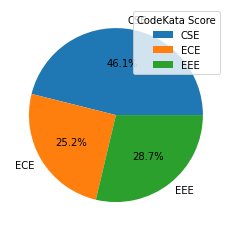

In [76]:
ce = df[df['Department']== 'Computer Science and Engineering']
ce

Ec = df[df['Department'] == 'Electronics and Communication Engineering']
Ec

EL = df[df['Department'] == 'Electronics and Electrical Engineering']
EL

p = [ce['CodeKata Score'].mean(),Ec['CodeKata Score'].mean(),EL['CodeKata Score'].mean()]
plt.pie(p,labels= ['CSE','ECE','EEE'],autopct='%1.1f%%')
plt.legend(title = 'CodeKata Score')
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


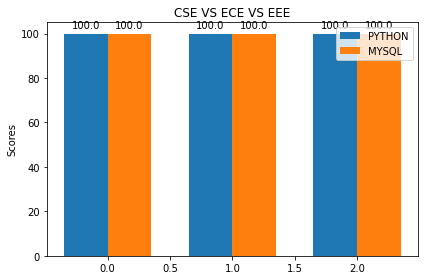

In [77]:
labels = ['CSE','ECE','EEE']
python = [ce['python'].max(),Ec['python'].max(),EL['python'].max()]
mysql = [ce['mysql'].max(),Ec['mysql'].max(),EL['mysql'].max()]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, python, width, label='PYTHON')
rects2 = ax.bar(x + width/2, mysql, width, label='MYSQL')


ax.set_ylabel('Scores')
ax.set_title('CSE VS ECE VS EEE')
ax.set_xticks(x, labels)
ax.legend()



def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


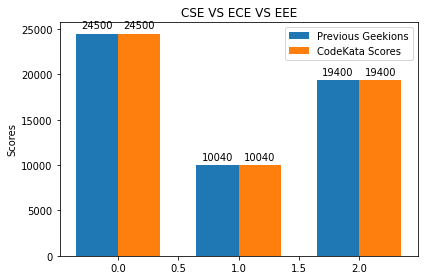

In [78]:
label = ['CSE','ECE','EEE']
PRE = [ce['Previous Geekions'].max(),Ec['Previous Geekions'].max(),EL['Previous Geekions'].max()]
COD = [ce['CodeKata Score'].max(),Ec['CodeKata Score'].max(),EL['CodeKata Score'].max()]

m = np.arange(len(label))  
width = 0.35  

fig, ax = plt.subplots()
rects3 = ax.bar(m - width/2, PRE, width, label='Previous Geekions')
rects4 = ax.bar(m + width/2, COD, width, label='CodeKata Scores')


ax.set_ylabel('Scores')
ax.set_title('CSE VS ECE VS EEE')
ax.set_xticks(m,label)
ax.legend()



def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()